# CPI Prediction Using Linear Regression and Random Forest (Tuned Models)
This notebook demonstrates how to predict Nigeria's Consumer Price Index (CPI) using economic indicators with two machine learning models: Linear Regression and Random Forest.

## Import Modules
We import the modules to be used for the hyperparameter tuning process

In [38]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

## Load and Prepare Data
We load the dataset and select relevant features for training.

In [39]:
import pandas as pd

# Load the dataset
df = pd.read_excel("../to_use datasets/complete_dataset.xlsx", engine="openpyxl")

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Select relevant features (No additions of other external features)
# trend decompostion not done yet
features = ['Exchange_Rate(Naira to USD)', 'Currency _in_Circulation', 'monetary_policy_rate',
            'Interbank_Call _rate', 'prime_Lending _rate', 'treasury_Bill_rate']
target = 'CPI'

# Drop rows with missing values
df = df[['Date'] + features + [target]].dropna()

# Define X and y
X = df[features]
y = df[target]
dates = df['Date']

In [40]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

In [41]:
# Time-aware split (no shuffle)
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X_scaled, y_scaled, dates, test_size=0.2, shuffle=False
)

## Train Models
We train the Linear Regression

### Linear Regression (Lasso and Ridge) L1 and L2 Regularization

In [42]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [43]:
# Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Grid Search
params = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipeline, params, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)

# Predict and evaluate
y_pred = grid.predict(X_test)
print("Best alpha:", grid.best_params_['ridge__alpha'])
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Best alpha: 10
MAE: 0.8727669721008181
RMSE: 1.1335366873189587
R² Score: -0.14145319243489407


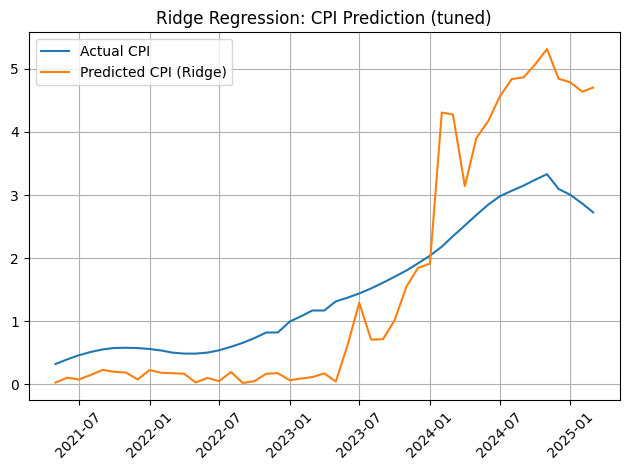

In [44]:
# Plot
plt.plot(dates_test, y_test, label='Actual CPI')
plt.plot(dates_test, y_pred, label='Predicted CPI (Ridge)')
plt.legend()
plt.xticks(rotation=45)
plt.title('Ridge Regression: CPI Prediction (tuned)')
plt.grid(True)
plt.tight_layout()
# plt.savefig('Figures/L2_regularization(Ridg')
plt.show()

### Lasso Regression

In [45]:
from sklearn.linear_model import Lasso

# Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000))
])

In [46]:
# Grid Search
params = {'lasso__alpha': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipeline, params, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)

,estimator,Pipeline(step...iter=10000))])
,param_grid,"{'lasso__alpha': [0.01, 0.1, ...]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [47]:
# Predict and evaluate
y_pred = grid.predict(X_test)
print("Best alpha:", grid.best_params_['lasso__alpha'])
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Best alpha: 1
MAE: 1.8784267380834727
RMSE: 4.521551548456403
R² Score: -3.553129605316637


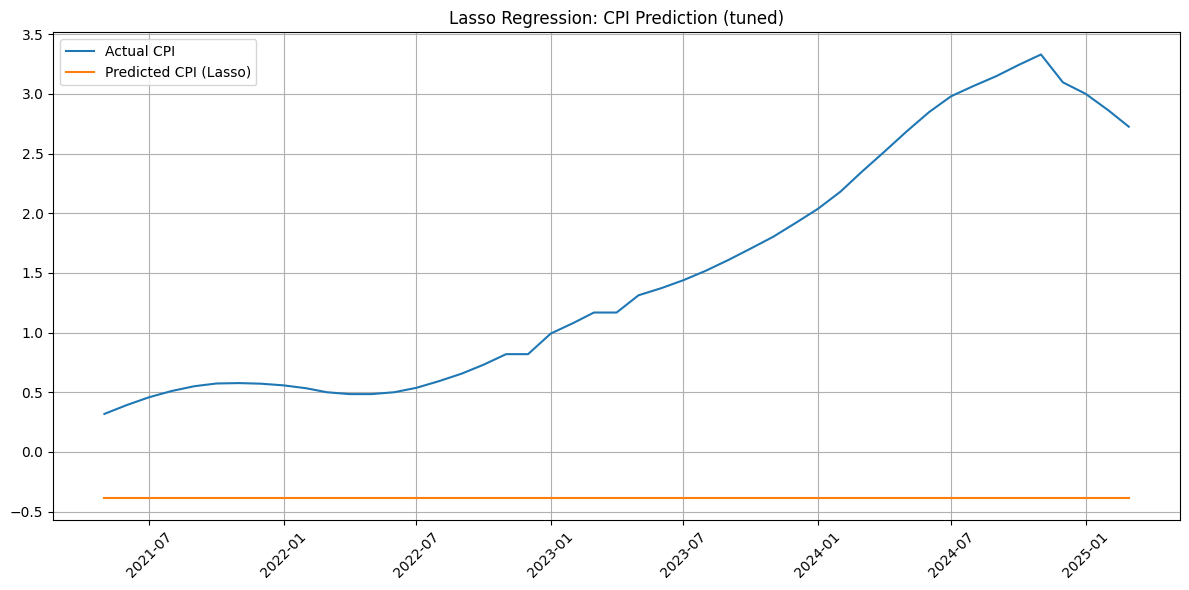

In [48]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(dates_test, y_test, label='Actual CPI')
plt.plot(dates_test, y_pred, label='Predicted CPI (Lasso)')
plt.legend()
plt.xticks(rotation=45)
plt.title('Lasso Regression: CPI Prediction (tuned)')
plt.grid(True)
plt.tight_layout()
# plt.savefig('Figures/L1_regularization(Lasso).png')
plt.show()

Using the added features derived from the base 

In [49]:
# Load the dataset
df = pd.read_csv("../to_use datasets/macro_indicators + additional_features.csv")

# Convert 'Date' to datetime
df['date'] = pd.to_datetime(df['date'])


# Final selected features
final_features = [
    'exchange_rate(naira_to_usd)', 'interest_rate', 'money_supply',
    'interbank_call__rate', 'prime_lending__rate',
    'currency__in_circulation', 'monetary_policy_rate', 'treasury_bill_rate',
    'month', 'quarter', 'is_december',
    'cpi_lag1', 'cpi_lag3', 'cpi_rollmean3', 'cpi_rollstd3'
]

target = 'cpi'

# Drop rows with missing values
df = df[['date'] + final_features + [target]].dropna()

# Define X and y
X = df[final_features]
y = df[target]
dates = df['date']

In [50]:
# Feature scaling (important for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

In [51]:
# Time-aware split (no shuffle)
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X_scaled, y_scaled, dates, test_size=0.2, shuffle=False
)

## Train Models
We train the Linear Regression

### Linear Regression (Lasso and Ridge) L1 and L2 Regularization

In [52]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [53]:
# Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Grid Search
params = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipeline, params, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)

# Predict and evaluate
y_pred = grid.predict(X_test)
print("Best alpha:", grid.best_params_['ridge__alpha'])
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Best alpha: 0.01
MAE: 0.025147877740176284
RMSE: 0.0012915293498619168
R² Score: 0.9986286140130195


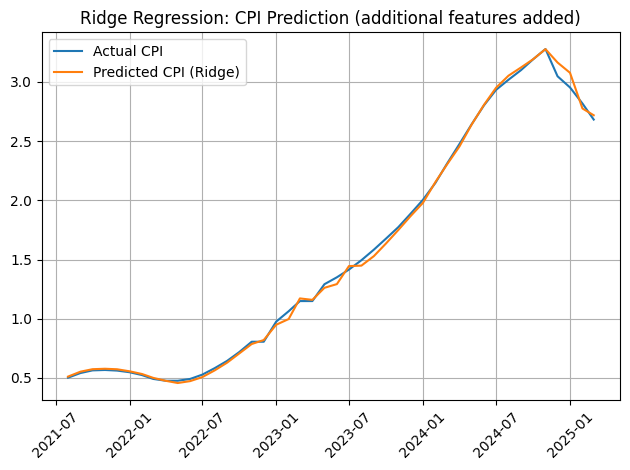

In [54]:
# Plot
plt.plot(dates_test, y_test, label='Actual CPI')
plt.plot(dates_test, y_pred, label='Predicted CPI (Ridge)')
plt.legend()
plt.xticks(rotation=45)
plt.title('Ridge Regression: CPI Prediction (additional features added)')
plt.grid(True)
plt.tight_layout()
# plt.savefig('Figures/L2_regularization(Ridg')
plt.show()

### Lasso Regression

In [55]:
from sklearn.linear_model import Lasso

# Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000))
])

In [56]:
# Grid Search
params = {'lasso__alpha': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipeline, params, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)

,estimator,Pipeline(step...iter=10000))])
,param_grid,"{'lasso__alpha': [0.01, 0.1, ...]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [60]:
# Predict and evaluate
y_pred = grid.predict(X_test)
print("Best alpha:", grid.best_params_['lasso__alpha'])
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Best alpha: 0.01
MAE: 0.07851341953629704
RMSE: 0.007938954463214751
R² Score: 0.9915701715154263


In [62]:
from sklearn.metrics import mean_squared_error, r2_score

# Use the best model from GridSearchCV
best_model = grid.best_estimator_

# Make predictions
train_preds = best_model.predict(X_train)
test_preds = best_model.predict(X_test)

# Calculate metrics
train_rmse = mean_squared_error(y_train, train_preds)
test_rmse = mean_squared_error(y_test, test_preds)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

# Print results
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R²:", train_r2)
print("Test R²:", test_r2)

Train RMSE: 0.0024147684812424255
Test RMSE: 0.007938954463214751
Train R²: 0.9907985955977866
Test R²: 0.9915701715154263


- Very small difference between Train RMSE and Test RMSE: Only about 0.0055, which means your model generalizes well — no strong signs of overfitting.

- R² on Train and Test are very close (≈ 0.99): This suggests the model captures the variance in both datasets consistently.

- Test performance is even slightly better than Train R²: This can happen with regularization and well-chosen validation sets.

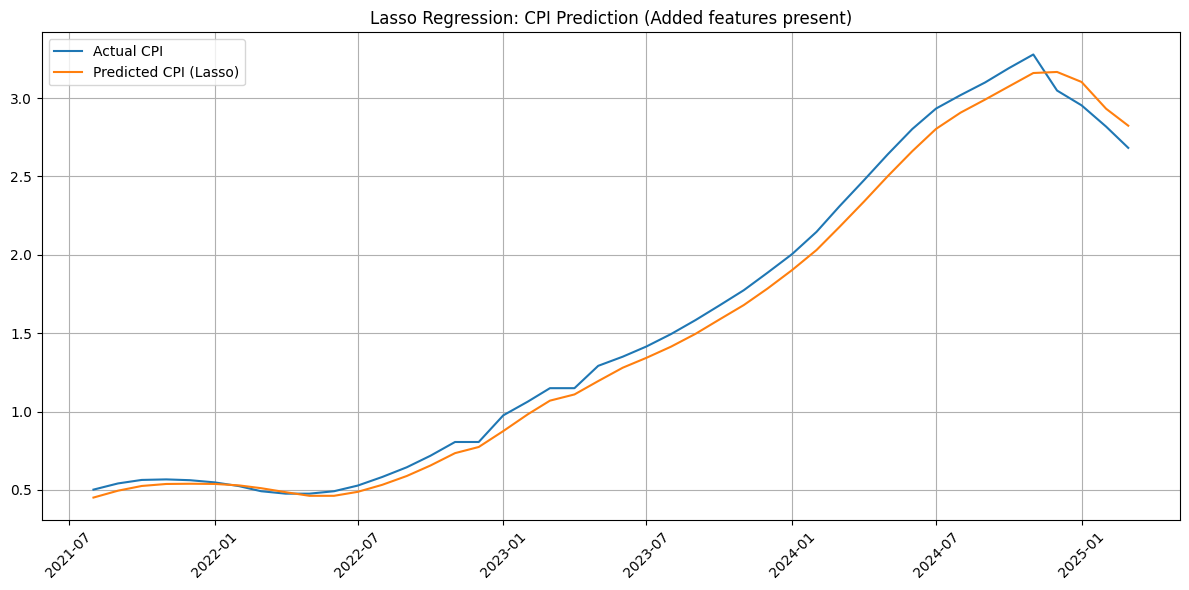

In [69]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(dates_test, y_test, label='Actual CPI')
plt.plot(dates_test, y_pred, label='Predicted CPI (Lasso)')
plt.legend()
plt.xticks(rotation=45)
plt.title('Lasso Regression: CPI Prediction (Added features present)')
plt.grid(True)
plt.tight_layout()
# plt.savefig('Figures/L1_regularization(Lasso).png')
plt.show()